# Initial data exploration of one country : Italia

## Data loading

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_context('talk')
# plt.figure(figsize=(100,60))

INPUT_DIR = '../data/raw/COVID-19-master/csse_covid_19_data/csse_covid_19_time_series/'

global_death_covid = pd.read_csv(f"{INPUT_DIR}/time_series_covid19_deaths_global.csv")
glabal_cases_covid = pd.read_csv(f"{INPUT_DIR}/time_series_covid19_confirmed_global.csv")


## Data viz of Italy's death

([<matplotlib.axis.XTick at 0x241a0b64f70>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

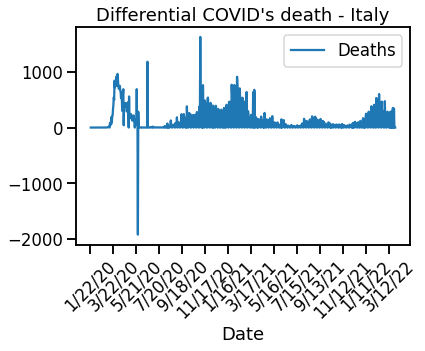

In [32]:
italia_death_data = global_death_covid[global_death_covid['Country/Region'] == "Spain"]
italia_death_data_time_serie = italia_death_data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

italia_death_data_time_serie = italia_death_data_time_serie.T
italia_death_data_time_serie.columns=['Deaths']

italia_death_data_time_serie_diff = italia_death_data_time_serie.diff(axis=0)

sns.lineplot(data=italia_death_data_time_serie_diff).set(title="Differential COVID's death - Italy")
plt.xlabel("Date")
plt.xticks(rotation="45")
plt.xticks(italia_death_data_time_serie_diff.index[::60])

## Data Viz of Italy's cases

([<matplotlib.axis.XTick at 0x2419ad53ca0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

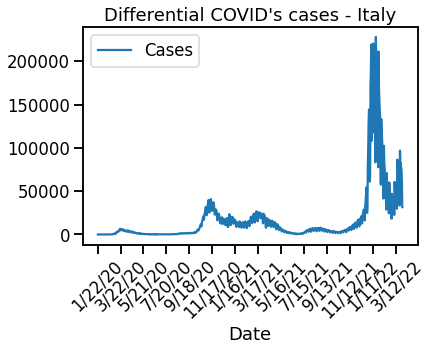

In [6]:
itala_cases_data = glabal_cases_covid[glabal_cases_covid['Country/Region'] == "Italy"]
italia_cases_data_time_serie = itala_cases_data.drop(['Province/State', 'Country/Region', 'Lat', 'Long'], axis=1)

italia_cases_data_time_serie = italia_cases_data_time_serie.T
italia_cases_data_time_serie.columns = ['Cases']

italia_cases_data_time_serie_diff = italia_cases_data_time_serie.diff(axis=0)

sns.lineplot(data=italia_cases_data_time_serie_diff).set(title="Differential COVID's cases - Italy")
plt.xlabel("Date")
plt.xticks(rotation="45")
plt.xticks(italia_cases_data_time_serie_diff.index[::60])

## Getting a general insight about one country

Cases date range : from 1/22/20 to 3/28/22
Death date range : from 1/22/20 to 3/28/22


([<matplotlib.axis.XTick at 0x1e729d91cf0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

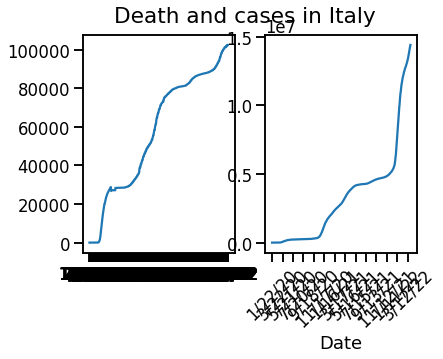

In [20]:
print(f"Cases date range : from {italia_cases_data_time_serie.index[0]} to {italia_cases_data_time_serie.index[-1]}")
print(f"Death date range : from {italia_cases_data_time_serie.index[0]} to {italia_cases_data_time_serie.index[-1]}")

death_cases_italy = pd.concat([italia_cases_data_time_serie, italia_death_data_time_serie], axis=1)
fig, (ax1, ax2) = plt.subplots(1, 2)# type: ignore
fig.suptitle('Death and cases in Italy')


ax1.plot(death_cases_italy.Deaths)

# plt.xlabel("Date")
# plt.xticks(rotation="45")
# plt.xticks(death_cases_italy.index[::60])

ax2.plot(death_cases_italy.Cases)

plt.xlabel("Date")
plt.xticks(rotation="45")
plt.xticks(death_cases_italy.index[::60])

In [36]:
global_death_covid.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/19/22,3/20/22,3/21/22,3/22/22,3/23/22,3/24/22,3/25/22,3/26/22,3/27/22,3/28/22
0,NaN,Afghanistan,33.93911,67.709953,0,0,0,0,0,0,...,7652,7654,7654,7656,7657,7657,7657,7657,7662,7663
1,NaN,Albania,41.15330,20.168300,0,0,0,0,0,0,...,3487,3487,3487,3489,3489,3489,3490,3491,3491,3491
2,NaN,Algeria,28.03390,1.659600,0,0,0,0,0,0,...,6871,6871,6872,6873,6873,6873,6873,6873,6873,6873
3,NaN,Andorra,42.50630,1.521800,0,0,0,0,0,0,...,153,153,153,153,153,155,153,153,153,153
4,NaN,Angola,-11.20270,17.873900,0,0,0,0,0,0,...,1900,1900,1900,1900,1900,1900,1900,1900,1900,1900
